<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793509/blob/main/IBM%20-%20Data%20Analysis%20with%20Python/Semana%205%20-%20Data%20Analysis%20with%20Python%20(IBM)%20(M%C3%B3dulo%202).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

📅 Semana 5

🚀 Curso: Data Analysis with Python (IBM: DA0101EN)

📖 Módulo 2

Alberto José García Porras (**A01793509**)


---

⚠ **Técnicas de preprocesamiento de datos:**


*   Es importante, antes de comenzar con el análisis de los datos, revisar el conjunto con el fin de encontrar datos perdidos, con formato errado o cualquier otra anomalía y validar si se deben corregir en aras de que impacten nuestro posterior análisis.


*   A estas técnicas se les conocce como **data cleaning** or **data wrangling**. 

*   Existen tres conceptos clave en las técnicas de preprocesamiento:
  *  **Estandarización**; que nos permite llevar a un mismo formato, una misma unidad o una misma convención los datos del conjunto.
  *  **Normalización**; que nos permite llevar los datos a un rango común.
  *  **Agrupamiento**; que nos permite crear categorías o agrupaciones a partir de los valores numéricos de nuestro conjunto.





---

☝ **NOTA:** Trabajaremos con la base de datos **food-consumption.csv** que contiene información del consumo de ciertos tipos de comida en Europa y los países Escandinavos. Los valores mostrados en cada columna corresponden al porcentaje de la población que consume ese tipo de alimento.

---

👓 Siguiendo lo aprendido en el módulo 1 utilizaremos el método **read_csv()** de la librería **Pandas** para leer los datos e introducirlos en nuestro dataframe.

---

In [23]:
#Importamos la librería pandas y leemos el archivo weight-height.csv
import pandas as pd
url = "https://openmv.net/file/food-consumption.csv"
df = pd.read_csv(url)
#Visualizamos los primeros 10 registros
df.head(10)

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


---

☝ **NOTA:** Ahora comenzaremos a buscar valores faltantes en el conjunto. Normalmente estos valores los observaremos como "?" o NaN. Existen varias formas de buscar valores nulos o NaN en el conjunto de datos, a continuación evaluaremos algunas de ellas.

---


In [24]:
#Nos mostrará con 'True' aquellas columnas en las que existen valores perdidos
df.isna().any()

Country           False
Real coffee       False
Instant coffee    False
Tea               False
Sweetener          True
Biscuits           True
Powder soup       False
Tin soup          False
Potatoes          False
Frozen fish       False
Frozen veggies    False
Apples            False
Oranges           False
Tinned fruit      False
Jam               False
Garlic            False
Butter            False
Margarine         False
Olive oil         False
Yoghurt            True
Crisp bread       False
dtype: bool

---

👓 Observamos que de las 21 columnas solo las columnas de endulzantes (Sweetener), bizcochos (Biscuits) y Yoghurt contienen datos perdidos. Validemos ahora la información faltante por cada columna.

---

In [37]:
#Creamos un dataframe llamado "dataperdida" en el que guardaremos los datos faltantes del dataframe original "df"
dataperdida = df.isna()
dataperdida

#Recorremos las columnas obtenidas en "dataperdida" y vamos imprimiendo la cantidad de registros con valores perdidos (True) y valores correctos (False)
for column in dataperdida.columns.values.tolist():
    print(column)
    print (dataperdida[column].value_counts())
    print("") 

Country
False    16
Name: Country, dtype: int64

Real coffee
False    16
Name: Real coffee, dtype: int64

Instant coffee
False    16
Name: Instant coffee, dtype: int64

Tea
False    16
Name: Tea, dtype: int64

Sweetener
False    15
True      1
Name: Sweetener, dtype: int64

Biscuits
False    15
True      1
Name: Biscuits, dtype: int64

Powder soup
False    16
Name: Powder soup, dtype: int64

Tin soup
False    16
Name: Tin soup, dtype: int64

Potatoes
False    16
Name: Potatoes, dtype: int64

Frozen fish
False    16
Name: Frozen fish, dtype: int64

Frozen veggies
False    16
Name: Frozen veggies, dtype: int64

Apples
False    16
Name: Apples, dtype: int64

Oranges
False    16
Name: Oranges, dtype: int64

Tinned fruit
False    16
Name: Tinned fruit, dtype: int64

Jam
False    16
Name: Jam, dtype: int64

Garlic
False    16
Name: Garlic, dtype: int64

Butter
False    16
Name: Butter, dtype: int64

Margarine
False    16
Name: Margarine, dtype: int64

Olive oil
False    16
Name: Olive oil, d

---

✍ Ahora podemos observar que de los 16 registros existentes en el conjunto de datos, solo 1 registro presenta valor perdido para las columnas mencionadas anteriormente (Sweetener, Biscuits y Yoghurt).

---

📚 Sabemos que existen varias técnicas para gestionar la data perdida:
*   Eliminar los registros con datos perdidos
*   Eliminar las columnas con datos perdidos
*   Reemplazar los datos perdidos utilizando el promedio de la columna
*   Reemplazar los datos perdidos utilizando la frecuencia (moda) de la columna
*   Reemplazar los datos perdidos basándonos en otras funciones


---



☝**PARA TENER EN CUENTA:** La técnica que utilicemos dependerá del análisis que hagamos de los datos perdidos, ya que la escogencia de una u otra opción podría impactar la integridad de nuestro conjunto de datos. Por ejemplo; si optamos por utilizar la eliminación de las columnas con datos perdidos, podríamos perder información clave de otros registros que no tienen datos perdidos.


---



👣 **Reemplazo utilizando promedio de columna con datos perdidos**: Esta técnica la aplicaremos a la columna "Sweetener" por lo cual inicialmente obtendremos el promedio en una variable para utilizar en la función de reemplazo posteriormente. Crearemos una copia del dataframe original para validar todas las técnicas de ajuste de datos perdidos.

In [41]:
#Importamos la librería numpy
import numpy as np

In [43]:
#Copiamos el dataframe original
dfCopia = df.copy()
#Aplicaremos a la columna "Sweetener" un reemplazo de datos utilizando el promedio de la columna.
mean_Sweetener = dfCopia["Sweetener"].mean(axis=0)
mean_Sweetener
#Reemplazamos los valores faltantes por el promedio calculado anteriormente
dfCopia["Sweetener"].replace(np.nan, mean_Sweetener, inplace=True)

print("Se ajustaron los valores perdidos con el siguiente valor promedio para la columna Sweetener:",mean_Sweetener)

Se ajustaron los valores perdidos con el siguiente valor promedio para la columna Sweetener: 18.0


In [60]:
#Validamos si efectivamente este es el promedio (mean) de la columna
dfCopia[["Sweetener"]].describe(include="all")

,Sweetener
count,15.000000
mean,17.866667
std,10.888176
min,2.000000
25%,11.000000
50%,18.000000
75%,26.500000
max,35.000000


In [45]:
#Validamos si se ajustó correctamente el valor perdido en la columna "Sweetener", verificando que no aparezca en verdadero con el siguiente comando
dfCopia.isna().any()

Country           False
Real coffee       False
Instant coffee    False
Tea               False
Sweetener         False
Biscuits           True
Powder soup       False
Tin soup          False
Potatoes          False
Frozen fish       False
Frozen veggies    False
Apples            False
Oranges           False
Tinned fruit      False
Jam               False
Garlic            False
Butter            False
Margarine         False
Olive oil         False
Yoghurt            True
Crisp bread       False
dtype: bool


---

👣 **Reemplazo utilizando la frecuencia (moda) de la columna con datos perdidos**: Esta técnica la aplicaremos a la columna "Biscuits" por lo cual inicialmente obtendremos el valor que más se repite en una variable para utilizarla en la función de reemplazo posteriormente. Seguimos trabajando con el dataframe de copia.


In [46]:
#Aplicaremos a la columna "Biscuits" un reemplazo de datos utilizando el frecuente de la columna.
Frec_Biscuits = df['Biscuits'].value_counts().idxmax()
mean_Sweetener
#Reemplazamos los valores faltantes por el frecuente obtenido anteriormente
dfCopia["Biscuits"].replace(np.nan, Frec_Biscuits, inplace=True)

print("Se ajustaron los valores perdidos con el siguiente valor frecuente para la columna Biscuits:",Frec_Biscuits)

Se ajustaron los valores perdidos con el siguiente valor frecuente para la columna Biscuits: 62.0


In [47]:
#Validamos si se ajustó correctamente el valor perdido en la columna "Biscuits", verificando que no aparezca en verdadero con el siguiente comando
dfCopia.isna().any()

Country           False
Real coffee       False
Instant coffee    False
Tea               False
Sweetener         False
Biscuits          False
Powder soup       False
Tin soup          False
Potatoes          False
Frozen fish       False
Frozen veggies    False
Apples            False
Oranges           False
Tinned fruit      False
Jam               False
Garlic            False
Butter            False
Margarine         False
Olive oil         False
Yoghurt            True
Crisp bread       False
dtype: bool


---

👣 **Eliminación de registros con valores faltantes**: Esta técnica la aplicaremos a la columna "Yoghurt" por lo cual se eliminará 1 registro del dataframe de acuerdo al análisis que  hicimos en los puntos anteriores. Seguimos trabajando con el dataframe de copia.




In [48]:
#Simplemente indicamos la columna a la que queremos aplicarle esta técnica y el parámetro axis=0 para que sepa que debe borrar los registros que tengan faltantes
dfCopia.dropna(subset=["Yoghurt"], axis=0, inplace=True)
#Reseteamos el indice del dataframe debido a la eliminación del registro
dfCopia.reset_index(drop=True, inplace=True)

In [49]:
#Validamos si se ajustó correctamente el valor perdido en la columna "Yoghurt", verificando que no aparezca en verdadero con el siguiente comando
dfCopia.isna().any()

Country           False
Real coffee       False
Instant coffee    False
Tea               False
Sweetener         False
Biscuits          False
Powder soup       False
Tin soup          False
Potatoes          False
Frozen fish       False
Frozen veggies    False
Apples            False
Oranges           False
Tinned fruit      False
Jam               False
Garlic            False
Butter            False
Margarine         False
Olive oil         False
Yoghurt           False
Crisp bread       False
dtype: bool

---

☝ **NOTA:** Ahora comenzaremos a verificar que la información se encuentre en el formato correcto.

---


👣 **Verificar el tipo de dato para todas las columnas del dataframe**: Esta técnica la aplicaremos para igualar todos los tipos de dato, actualmente nuestro dataframe tiene todos los valores numéricos, excepto la columna "Country", así que podría decirse que se encuentra con un formato correcto, pero supongamos que queremos cambiar el tipo de dato de las columnas "Sweetener", "Biscuits" y "Yoghurt" a Float, con el fin de que todos los datos numéricos queden con el mismo tipo de dato. Seguimos trabajando con el dataframe de copia.

In [61]:
#Validamos el tipo de dato para las columnas del dataframe, tal como se comentó todos tienen tipo int64 excepto las mencionadas para convertir.
dfCopia.dtypes

Country            object
Real coffee         int64
Instant coffee      int64
Tea                 int64
Sweetener         float64
Biscuits          float64
Powder soup         int64
Tin soup            int64
Potatoes            int64
Frozen fish         int64
Frozen veggies      int64
Apples              int64
Oranges             int64
Tinned fruit        int64
Jam                 int64
Garlic              int64
Butter              int64
Margarine           int64
Olive oil           int64
Yoghurt           float64
Crisp bread         int64
dtype: object

In [62]:
#Pasaremos el tipo de dato de "float64" a "int64"
dfCopia[["Sweetener","Biscuits","Yoghurt"]] = dfCopia[["Sweetener","Biscuits","Yoghurt"]].astype("int")
#Validamos nuevamente el tipo de dato para las columnas del dataframe, todas deben quedar como int64.
dfCopia.dtypes

Country           object
Real coffee        int64
Instant coffee     int64
Tea                int64
Sweetener          int64
Biscuits           int64
Powder soup        int64
Tin soup           int64
Potatoes           int64
Frozen fish        int64
Frozen veggies     int64
Apples             int64
Oranges            int64
Tinned fruit       int64
Jam                int64
Garlic             int64
Butter             int64
Margarine          int64
Olive oil          int64
Yoghurt            int64
Crisp bread        int64
dtype: object

---

☝ **NOTA:** Ahora validaremos las técnicas de **estandarización** de los datos, en la cual se busca que toda la data tenga formatos, unidades y convenciones iguales para facilitar el posterior análisis de los datos.

---

👣 **Verificar columnas susceptibles de estandarizar**: Esta técnica se utiliza para validar y comparar aquellos campos que por su naturaleza se encuentran con unidades de medida o conversión divergentes al compararlas con las otras columnas, por ejemplo; una columna que se encuentre en Kg y debería pasarse a G. Debido a que todos nuestros valores se encuentran expresados en porcentaje, no vemos candidatos para estandarizar, sin embargo, haremos un ejercicio de conversión de la columna "Potatoes", sumándole el valor 0.1 para realizar una conversión de prueba. Seguimos trabajando con el dataframe de copia.

In [64]:
#Realizamos la conversión de la columna mencionada para efectos del aprendizaje
dfCopia['Potatoes'] = dfCopia["Potatoes"] + 0.1
dfCopia.head()

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19,57,51,19,21.1,27,...,81,75,44,71,22,91,85,74,30,26
1,Italy,82,10,60,2,55,41,3,2.1,4,...,67,71,9,46,80,66,24,94,5,18
2,France,88,42,63,4,76,53,11,23.1,11,...,87,84,40,45,88,94,47,36,57,3
3,Holland,96,62,98,32,62,67,43,7.1,14,...,83,89,61,81,15,31,97,13,53,15
4,Belgium,94,38,48,11,74,37,23,9.1,13,...,76,76,42,57,29,84,80,83,20,5


---

☝ **NOTA:** Ahora validaremos las técnicas de **normalización** de los datos, en la cual se busca llevar los valores numéricos a un rango común de tal forma que se facilite el análisis posterior de los datos.

---

👣 **Verificar columnas susceptibles de normalizar**: Esta técnica normalmente incluye escalar las variables a un promedio de cero, escalar las variables para que la varianza sea igual a uno, o escalar las variables de tal forma que el rango de los valores se encuentre entre 0 y 1. Seguimos trabajando con el dataframe de copia.

In [65]:
#Le aplicaremos a las columna "Powder soup" la normalización para llevarlo a un rango de 0 a 1
dfCopia['Powder soup'] = dfCopia['Powder soup']/dfCopia['Powder soup'].max()
dfCopia.head()

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19,57,0.680000,19,21.1,27,...,81,75,44,71,22,91,85,74,30,26
1,Italy,82,10,60,2,55,0.546667,3,2.1,4,...,67,71,9,46,80,66,24,94,5,18
2,France,88,42,63,4,76,0.706667,11,23.1,11,...,87,84,40,45,88,94,47,36,57,3
3,Holland,96,62,98,32,62,0.893333,43,7.1,14,...,83,89,61,81,15,31,97,13,53,15
4,Belgium,94,38,48,11,74,0.493333,23,9.1,13,...,76,76,42,57,29,84,80,83,20,5


---

☝ **NOTA:** Ahora validaremos las técnicas de **binning** de los datos, en la cual se busca transformar las variables numéricas continuas a grupos categóricos de tal forma que se facilite el análisis agrupado de los datos.

---

👣 **Verificar columnas susceptibles de agrupamiento**: Esta técnica busca realizar agrupaciones que faciliten el análisis de los datos, para efectos del ejercicio, supongamos que queremos dividr la columna "Instant coffee" en tres categorías "Consumo Bajo" (de 10 a 35), "Consumo Medio" (de 35 a 60) y "Consumo Alto" (de 60 en adelante). Seguimos trabajando con el dataframe de copia.

Text(0.5, 1.0, 'Instant coffee bins')

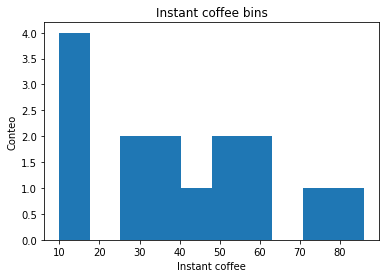

In [67]:
#Para comenzar, validemos como se ven los datos actualmente en la columna "Instant coffee"
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(dfCopia["Instant coffee"])

# set x/y labels and plot title
plt.pyplot.xlabel("Instant coffee")
plt.pyplot.ylabel("Conteo")
plt.pyplot.title("Instant coffee bins")

In [68]:
#Como lo agruparemos en 3 categorías, utilizaremos la función linspace de numpy para determinar las categorias espaciadas correctamente
categorias = np.linspace(min(df["Instant coffee"]), max(df["Instant coffee"]), 4)
categorias

array([10.        , 35.33333333, 60.66666667, 86.        ])

In [71]:
#Creamos las categorias
Categorias_nombres = ["Consumo Bajo","Consumo Medio", "Consumo Alto"]
#Creamos la nueva columna para aplicar la partición de acuerdo a las categorias y los nombres de las categorias
dfCopia['Instant coffee agrupado'] = pd.cut(dfCopia['Instant coffee'], categorias, labels=Categorias_nombres, include_lowest=True )
dfCopia[['Instant coffee','Instant coffee agrupado']].head(20)

,Instant coffee,Instant coffee agrupado
0,49,Consumo Medio
1,10,Consumo Bajo
2,42,Consumo Medio
3,62,Consumo Alto
4,38,Consumo Medio
5,61,Consumo Alto
6,86,Consumo Alto
7,26,Consumo Bajo
8,31,Consumo Bajo
9,72,Consumo Alto


In [72]:
#Contamos los valores agrupados
dfCopia["Instant coffee agrupado"].value_counts()

Consumo Bajo     6
Consumo Medio    5
Consumo Alto     4
Name: Instant coffee agrupado, dtype: int64

Text(0.5, 1.0, 'Categorías Instant coffee')

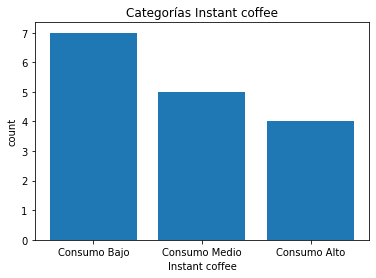

In [73]:
#Graficamos nuevamente la distribución pero ahora de las categorias
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(Categorias_nombres, df["Instant coffee agrupado"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Instant coffee")
plt.pyplot.ylabel("count")
plt.pyplot.title("Categorías Instant coffee")

👏 Fácilmente podemos identificar que la mayoría de personas presentan un consumo bajo de café instantaneo en las ciudades relacionadas con estos datos.

---

☝ **NOTA:** Ahora validaremos las técnicas de **indicador variable o variables dummy** en los datos, a través de las cuales se etiquetan categorías a partir de variables numéricas llamadas dummies. En nuestro caso no contamos con datos que puedan ser considerados categóricos, ya que contamos solo con porcentajes de consumo por país. Sin embargo, copiaremos las instrucciones a seguir para futuras referencias.

---

In [76]:
dfCopia.columns

Index(['Country', 'Real coffee', 'Instant coffee', 'Tea', 'Sweetener',
       'Biscuits', 'Powder soup', 'Tin soup', 'Potatoes', 'Frozen fish',
       'Frozen veggies', 'Apples', 'Oranges', 'Tinned fruit', 'Jam', 'Garlic',
       'Butter', 'Margarine', 'Olive oil', 'Yoghurt', 'Crisp bread',
       'Instant coffee agrupado'],
      dtype='object')

In [79]:
#Se crea el dataframe y se asigna a la variable dummy inicial
#variable_dummy1 = pd.get_dummies(dfCopia["Columna a asignar dummy"])

#Se renombran las columnas para que sean entendibles
#variable_dummy1.rename(columns={'NombreColumna1':'NuevoNombreColumna1', 'NombreColumna2':'NuevoNombreColumna2'}, inplace=True)

#Unimos la variable creada con el dataframe inicial
#dfCopia = pd.concat([dfCopia, variable_dummy1], axis=1)

#Eliminamos la columna original drop original column "fuel-type" from "df"
#df.drop("ColumnaOriginal", axis = 1, inplace=True)
